In [1]:
import sys
from importlib import reload 
sys.path.append('./lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("euclidian", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_2(for_ranking=True):
    # + not-ranking  (not-corrected euclidean version)
    return [
        ProductDistances([
            (10, Distances("euclidian", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("euclidian_corrected", scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]

def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]


def make_distances_osw(for_ranking=True):
    # + not-ranking  (not-corrected euclidean version)
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected", scalable=True))
        ], "sum")
    ]

def get_dists_weights(dists):
    return [x.get_weights() for x in dists]

def get_dists_weights_osw(dists):
    for dist in dists:
        w = dist.get_weights()
        smw = w[0].numpy() * tf.nn.softmax(w[1]).numpy()
        print(dist, ":", smw / smw.sum())
    return [x.get_weights() for x in dists]

_____________


### USCA312 fake product spaces example
**(no exponential map, just default gradients & adam optimizer)**

In [8]:
_, distances_matrix = utils.get_dataset("usca312")

Loading from ../datasets/usca312.edges


In [9]:
distances_matrix

array([[0.   , 1.167, 1.579, ..., 1.209, 0.866, 1.112],
       [1.167, 0.   , 0.413, ..., 0.045, 1.904, 0.082],
       [1.579, 0.413, 0.   , ..., 0.37 , 2.312, 0.467],
       ...,
       [1.209, 0.045, 0.37 , ..., 0.   , 1.95 , 0.107],
       [0.866, 1.904, 2.312, ..., 1.95 , 0.   , 1.87 ],
       [1.112, 0.082, 0.467, ..., 0.107, 1.87 , 0.   ]])

In [10]:
d = make_model()
qs = d.sparse_arange(312)  # queries
r_matrix = np.mean(distances_matrix <= 1.)  # not used
distances_matrix.shape

(312, 312)

In [11]:
dists = make_distances_osw(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

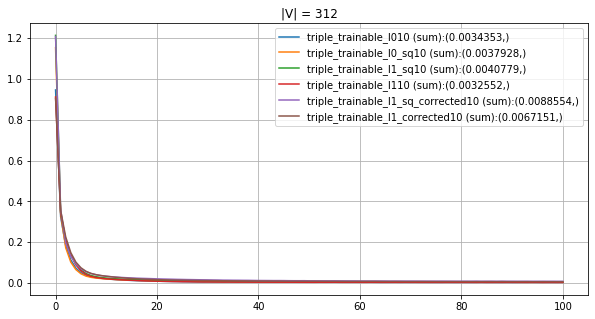


0.0034353	triple_trainable_l010 (sum)
0.0037928	triple_trainable_l0_sq10 (sum)
0.0040779	triple_trainable_l1_sq10 (sum)
0.0032552	triple_trainable_l110 (sum)
0.0088554	triple_trainable_l1_sq_corrected10 (sum)
0.0067151	triple_trainable_l1_corrected10 (sum)


In [12]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [13]:
get_dists_weights_osw(dists)

triple_trainable_l010 (sum) : [0.90686414 0.04106531 0.05207055]
triple_trainable_l0_sq10 (sum) : [0.91666655 0.03280686 0.05052659]
triple_trainable_l1_sq10 (sum) : [0.0145038  0.02592904 0.01762674 0.07293104 0.03854424 0.0230771
 0.02084961 0.78653843]
triple_trainable_l110 (sum) : [0.58391323 0.01501494 0.02278453 0.15114989 0.03449669 0.0234254
 0.10133026 0.03525558 0.0326295 ]
triple_trainable_l1_sq_corrected10 (sum) : [0.22623474 0.12878675 0.14347374 0.21032526 0.00200084 0.05748291
 0.22976903 0.00192672]
triple_trainable_l1_corrected10 (sum) : [0.00431943 0.10954776 0.07849351 0.00436569 0.48500715 0.13638565
 0.00368876 0.07735985 0.10083221]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.115956254884896>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([ 2.20430455, -0.89052439, -0.65308853])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2089455761122119>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([ 2.2809641 , -1.04914205, -0.61727993])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.5320332261218141>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(8,) dtype=float64, numpy=
  array([-1.00818006, -0.42722722, -0.81317392,  0.60692343, -0.03078412,
         -0.54374996, -0.64525566,  2.98505071])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.1915681302028933>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(9,) dtype=float64, numpy=
  array([ 2.3917019 , -1.26900508, -0.85196861,  1.0402215 , -0.43718721,
         -0.82422978,  0.64033457, -0

__________________

# CS PhDs

In [14]:
G, distances_matrix = utils.get_dataset(distances_matrix=True)

Loading from ../datasets/CSPhDs.edges
|V| = 1025, |E| = 1043


In [15]:
def make_model_g(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = np.mean(distances_matrix <= 1.)
distances_matrix.shape

(1025, 1025)

In [16]:
dists = make_distances_osw(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

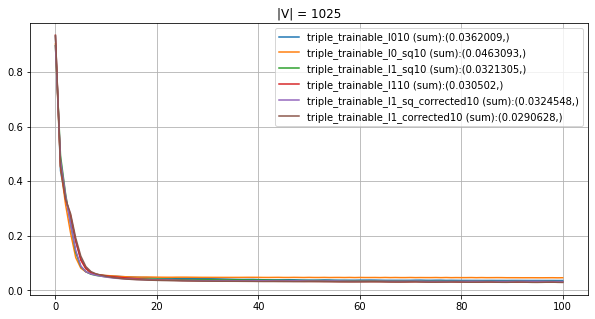


0.0362009	triple_trainable_l010 (sum)
0.0463093	triple_trainable_l0_sq10 (sum)
0.0321305	triple_trainable_l1_sq10 (sum)
0.030502	triple_trainable_l110 (sum)
0.0324548	triple_trainable_l1_sq_corrected10 (sum)
0.0290628	triple_trainable_l1_corrected10 (sum)


In [17]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [18]:
get_dists_weights_osw(dists)

triple_trainable_l010 (sum) : [0.00353115 0.36697633 0.62949252]
triple_trainable_l0_sq10 (sum) : [0.25555073 0.71120239 0.03324688]
triple_trainable_l1_sq10 (sum) : [1.80448036e-04 1.59992968e-03 4.84453817e-01 3.26444433e-01
 1.04040483e-04 1.86665094e-01 5.38166404e-04 1.40715477e-05]
triple_trainable_l110 (sum) : [9.56579660e-04 1.97682714e-04 1.23666957e-03 1.55568904e-04
 3.64463993e-01 9.08471530e-04 1.13104792e-01 2.40569538e-04
 5.18735673e-01]
triple_trainable_l1_sq_corrected10 (sum) : [8.75505041e-05 1.80104650e-03 1.87759349e-01 1.11701209e-03
 1.57403745e-05 5.67496574e-05 7.60685289e-01 4.84772629e-02]
triple_trainable_l1_corrected10 (sum) : [9.01615404e-04 1.89648230e-04 1.33497582e-03 1.47652984e-04
 3.63949405e-01 7.79859798e-04 1.12061498e-01 1.85694527e-04
 5.20449650e-01]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=5.70739980618628>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([-3.20424721,  1.43942517,  1.97904179])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=3.2833541716214025>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([ 0.41700522,  1.44054134, -1.62245471])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.717586154017524>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(8,) dtype=float64, numpy=
  array([-2.92919198, -0.74691986,  4.96614256,  4.5713802 , -3.47985474,
          4.01243653, -1.83646701, -5.48047996])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=3.853236339235712>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(9,) dtype=float64, numpy=
  array([-2.83674852, -4.4134493 , -2.57993538, -4.65302385,  3.10607045,
         -2.88834904,  1.93595744, -4.21

__________________

# POWER

In [19]:
G, distances_matrix = utils.get_dataset("power", distances_matrix=True)

Loading from ../datasets/power.edges
|V| = 4941, |E| = 6594


In [20]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = np.mean(distances_matrix <= 1.)
distances_matrix.shape

(4941, 4941)

In [21]:
dists = make_distances_osw(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

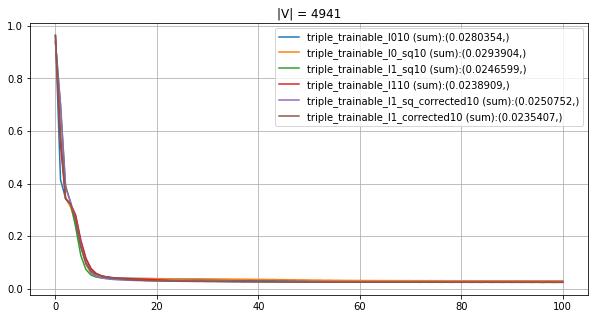

In [22]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20
)

In [23]:
get_dists_weights_osw(dists)

triple_trainable_l010 (sum) : [0.0031929  0.36517354 0.63163356]
triple_trainable_l0_sq10 (sum) : [5.38472156e-04 2.51718391e-01 7.47743137e-01]
triple_trainable_l1_sq10 (sum) : [3.51586759e-04 7.75628709e-04 2.11715352e-01 1.10305113e-03
 2.25109347e-05 1.34158021e-04 7.04294209e-01 8.16035043e-02]
triple_trainable_l110 (sum) : [1.04758526e-03 7.92201378e-04 1.26401698e-03 9.21841002e-02
 4.28920960e-04 4.96185729e-01 1.09487044e-04 4.06628486e-01
 1.35947388e-03]
triple_trainable_l1_sq_corrected10 (sum) : [3.54892322e-04 1.09618882e-03 1.51801960e-04 6.35277790e-01
 9.87178609e-02 2.62998469e-01 1.38087409e-03 2.21225691e-05]
triple_trainable_l1_corrected10 (sum) : [1.19269449e-03 7.81750185e-04 1.53837959e-03 1.08286582e-01
 9.72144009e-04 4.37926411e-01 1.40199576e-04 4.47942850e-01
 1.21898964e-03]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=8.094416304854393>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([-3.25554882,  1.48389579,  2.03183251])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=8.99484504869869>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([-4.55180254,  1.59552791,  2.68427647])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=6.052690499660327>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(8,) dtype=float64, numpy=
  array([-3.91420833, -3.12299089,  2.48633314, -2.77082946, -6.66266365,
         -4.87764646,  3.68828663,  1.53296265])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=5.609965886195906>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(9,) dtype=float64, numpy=
  array([-2.54853644, -2.82796385, -2.36072947,  1.92876347, -3.44150682,
          3.61192611, -4.80697325,  3.412

_______________________

# Facebook

In [24]:
G, distances_matrix = utils.get_dataset("facebook", distances_matrix=True)

Loading from ../datasets/facebook.edges
|V| = 4039, |E| = 88234


In [25]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = 1. * (distances_matrix <= 1.)
distances_matrix.shape

(4039, 4039)

In [26]:
dists = make_distances_osw(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

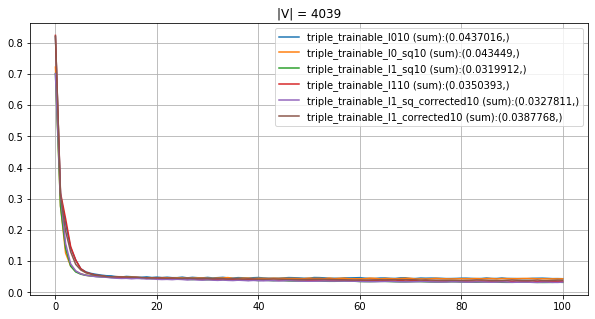

In [27]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [28]:
get_dists_weights_osw(dists)

triple_trainable_l010 (sum) : [0.04152213 0.30644942 0.65202844]
triple_trainable_l0_sq10 (sum) : [0.00703296 0.11047115 0.88249589]
triple_trainable_l1_sq10 (sum) : [4.93765030e-02 1.69123945e-03 2.10521295e-04 9.24663194e-01
 2.28658755e-02 2.76605346e-04 9.10923915e-04 5.13754190e-06]
triple_trainable_l110 (sum) : [5.61808225e-04 1.60987654e-01 4.58248241e-03 6.72607541e-02
 2.31231434e-02 6.06223928e-01 5.50553427e-04 1.32756577e-01
 3.95309875e-03]
triple_trainable_l1_sq_corrected10 (sum) : [4.85581347e-02 5.98120687e-04 1.74235099e-04 3.76547127e-04
 4.39424661e-06 3.11555103e-04 9.33735904e-01 1.62411091e-02]
triple_trainable_l1_corrected10 (sum) : [0.0011836  0.21701081 0.00827181 0.02310913 0.20133493 0.02899144
 0.00127413 0.0052249  0.51359926]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.3100798531007989>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([-1.78830901,  0.21051707,  0.96555252])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.8013190418296454>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([-3.07642912, -0.32228202,  1.75571767])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.7186402514952384>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(8,) dtype=float64, numpy=
  array([ 0.46947366, -2.90453933, -4.98816946,  3.39942856, -0.30035535,
         -4.71516453, -3.5232969 , -8.70118154])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.3324378341507035>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(9,) dtype=float64, numpy=
  array([-4.42086656,  1.23705584, -2.32203098,  0.36430508, -0.70343784,
          2.5629776 , -4.44110311,  

______________________
## Wiki 
### aka WLA6 - bfs on Wikipedia categories from Linear Algebra, depth = 6

In [29]:
G, distances_matrix = utils.get_dataset("wla6", distances_matrix=True)

Loading from ../datasets/wla6.edges
|V| = 3227, |E| = 3604


In [30]:
make_model_g = lambda : make_model(len(G.nodes()))
def make_model_g2(emb_size=10):
    return make_model_2(emb_size=emb_size, l=len(G.nodes()))

d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))  # queries
r_matrix = 1. * (distances_matrix <= 1.)
distances_matrix.shape

(3227, 3227)

In [31]:
dists = make_distances_osw(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

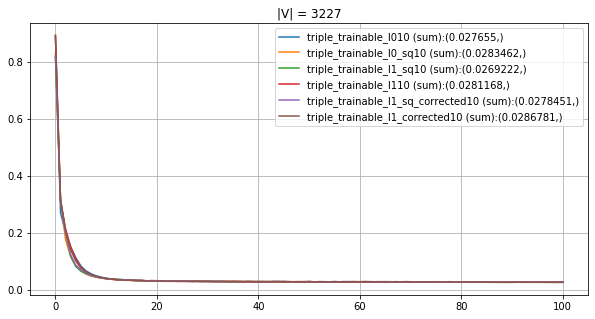

In [32]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [33]:
get_dists_weights_osw(dists)

triple_trainable_l010 (sum) : [0.00784239 0.98329291 0.0088647 ]
triple_trainable_l0_sq10 (sum) : [0.00271079 0.97865866 0.01863055]
triple_trainable_l1_sq10 (sum) : [4.21043949e-01 3.61461641e-03 4.06995261e-01 1.62868496e-01
 3.69652855e-03 6.50758789e-04 1.08876857e-03 4.16210882e-05]
triple_trainable_l110 (sum) : [1.64534831e-03 9.77834213e-01 2.66663398e-03 4.47336586e-04
 8.61876440e-04 1.97582549e-03 9.74070470e-03 1.95104979e-03
 2.87701187e-03]
triple_trainable_l1_sq_corrected10 (sum) : [9.59722503e-01 4.40593729e-03 7.78538925e-03 1.94078391e-02
 5.07623062e-03 9.16650027e-04 2.50937668e-03 1.76074112e-04]
triple_trainable_l1_corrected10 (sum) : [9.96856083e-04 8.97912881e-01 3.00417820e-03 1.31569203e-02
 7.58910595e-02 6.40044664e-03 2.04859292e-04 7.41840266e-04
 1.69095834e-03]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2365571490478842>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([-0.60087455,  4.23048904, -0.47834102])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.249349076079148>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([-1.90985863,  3.97908534,  0.01770525])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.400061521722299>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(8,) dtype=float64, numpy=
  array([ 2.94367983, -1.81407165,  2.90974416,  1.99388572, -1.79166324,
         -3.52867361, -3.01401008, -6.2782057 ])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2023782545759336>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(9,) dtype=float64, numpy=
  array([-0.80615974,  5.5812283 , -0.32329485, -2.10855582, -1.4527552 ,
         -0.62312556,  0.97220162, -0.

# eu Core

In [34]:
G, distances_matrix, r_matrix  = utils.get_dataset("eu-core.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/eu-core.edges
|V| = 986, |E| = 16687


In [35]:
dists = make_distances_osw(for_ranking=False)
get_dists_weights(dists)

[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.0>]]

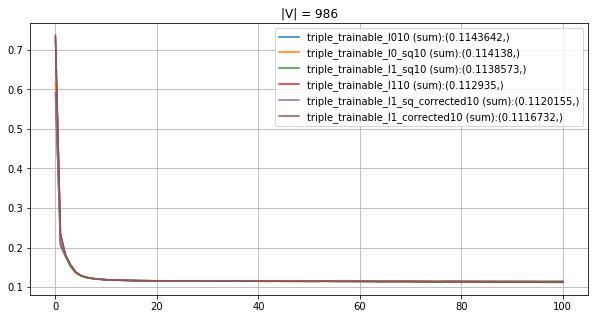

In [36]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_g, qs, distances_matrix, r_matrix,
    dists, 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    calc_ranking=False
)

In [37]:
get_dists_weights_osw(dists)

triple_trainable_l010 (sum) : [0.02259221 0.96540452 0.01200327]
triple_trainable_l0_sq10 (sum) : [0.00911114 0.93955375 0.0513351 ]
triple_trainable_l1_sq10 (sum) : [0.80823533 0.02808189 0.01694283 0.08890156 0.02565126 0.01374482
 0.01686469 0.00157762]
triple_trainable_l110 (sum) : [0.00153106 0.38674569 0.00420784 0.05346719 0.26120649 0.02838553
 0.0015095  0.25993618 0.0030105 ]
triple_trainable_l1_sq_corrected10 (sum) : [0.31879102 0.00431108 0.01009379 0.64926238 0.00594141 0.0072811
 0.00274275 0.00157646]
triple_trainable_l1_corrected10 (sum) : [0.0010283  0.19618338 0.0018701  0.01420802 0.40815537 0.00970334
 0.00127304 0.36607244 0.001506  ]


[[<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.6177474700319306>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([-0.52103775,  3.23390429, -1.15346388])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.6179494417776953>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(3,) dtype=float64, numpy=array([-1.99309383,  2.64281308, -0.26421717])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.6396544822287877>,
  <tf.Variable 'triple_trainable_l1_sq_distance_weights:0' shape=(8,) dtype=float64, numpy=
  array([ 3.3000211 , -0.05970715, -0.56498767,  1.09269753, -0.15023949,
         -0.77416984, -0.5696102 , -2.9389137 ])>],
 [<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.6534124489359081>,
  <tf.Variable 'triple_trainable_distance_weights:0' shape=(9,) dtype=float64, numpy=
  array([-2.37213328,  3.1596721 , -1.36114501,  1.18097294,  2.76721599,
          0.54778425, -2.38631553,  